In [1]:
%time
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [2]:
%time
def create_mollweide_axes():
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection="mollweide")
    return ax

def rot_x(Vect,phi):
    mat_rot1 = np.array([[1,0,0],[0,np.cos(phi),-np.sin(phi)],[0,np.sin(phi),np.cos(phi)]])
    vect_2 = mat_rot1.dot(Vect)
    return vect_2

def rot_psi(Vect,U,psi):#U=beta
    ux = U[0]
    uy = U[1]
    uz = U[2]
    c = np.cos(psi)
    s = np.sin(psi)
    mat_rot2 = np.array([
        [ux**2*(1-c)+c , ux*uy*(1-c)-uz*s , ux*uz*(1-c)+uy*s],
        [ux*uy*(1-c)+uz*s , uy**2*(1-c)+c , uz*uy*(1-c)-ux*s],
        [ux*uz*(1-c)-uy*s , uz*uy*(1-c)+ux*s , uy**2*(1-c)+c]
        ])
    vect_2 = mat_rot2.dot(Vect)
    return vect_2

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [3]:
%time
NSIDE = 128
NPIX = hp.nside2npix(NSIDE)
I_lu = np.zeros(NPIX)
vec = np.array([np.cos(np.radians(95)),np.sin(np.radians(95)),0])
beta = np.array([np.cos(np.radians(45)),np.sin(np.radians(45)),0])

day_sec = 60*60*24#1日の秒数
year_sec = day_sec*365
phi = []
psi = []

Vect1deg = [[],[],[]]
Vect2deg = [[], []]
map_2D = [[],[]]


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


In [4]:
%time
for t in range(year_sec):
    psi.append(2*np.pi*t/600)#600=10分で１週
    phi.append(2*np.pi*t/5760)#5760=96分で地球を一周

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [5]:
%time
for i in range(year_sec):
    rott1 = rot_psi(vec,beta,psi[i])
    rott2 = rot_x(rott1,phi[i])
    Vect1deg[0].append(rott2[0])
    Vect1deg[1].append(rott2[1])
    Vect1deg[2].append(rott2[2])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [6]:
%time
for i in range(year_sec):
    keido = np.arcsin(Vect1deg[2][i])
    ido = np.arcsin(Vect1deg[1][i]/np.cos(keido))
    Vect2deg[0].append(keido)
    Vect2deg[1].append(ido)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [7]:
%time
Vect1deg = np.array(Vect1deg)
pix_d = hp.vec2pix(NSIDE,Vect1deg[0],Vect1deg[1],Vect1deg[2])
for i in range(year_sec):
    I_lu[pix_d[i]] += 1

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10.3 µs


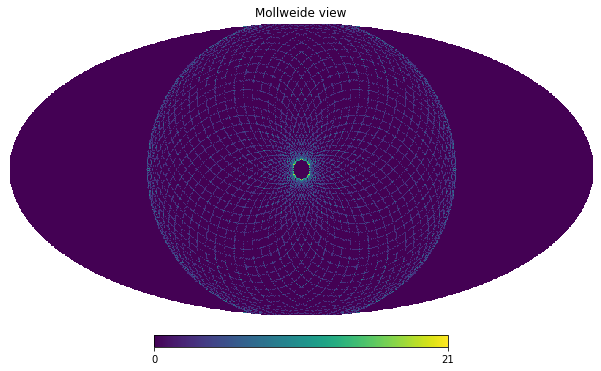

In [8]:
hp.mollview(I_lu)